In [32]:
import catboost
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
tqdm.pandas()

In [2]:
df = pd.read_csv('./data/train.csv')

/home/yahabo/venvs/raif/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# split to train and test

In [3]:
df = df.sort_values('date')
n_train = int(len(df) * 0.8)
n_test = len(df) - n_train
n_train

223833

In [4]:
train_df = df.head(n_train)
len(train_df)

223833

In [5]:
min(train_df['date']), max(train_df['date'])

('2020-01-05', '2020-07-12')

In [6]:
test_df = df.tail(n_test)
len(test_df)

55959

In [7]:
min(test_df['date']), max(test_df['date'])

('2020-07-12', '2020-08-23')

In [8]:
train_df.columns

Index(['city', 'floor', 'id', 'lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_name', 'osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in

# Write to csv

In [29]:
train_df.to_csv('./data/train_my.csv')

In [30]:
test_df.to_csv('./data/test_my.csv')

Справочники районов гордов
Справочники метро

In [8]:
df[(np.abs(df['per_square_meter_price']-df['per_square_meter_price'].mean()) > (3*df['per_square_meter_price'].std()))]

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
174,Москва,NaN,COL_177,55.747643,37.540714,11,198,288,366,0,...,7.430380,6.400000,1955.594937,1957.400000,Москва,70.000000,S20099,2020-01-05,100,0
175,Москва,NaN,COL_178,55.749508,37.537064,18,176,218,329,0,...,7.754717,5.850000,1963.207547,1963.550000,Москва,380.000000,S20099,2020-01-05,110,0
177,Москва,NaN,COL_180,55.747643,37.540714,11,198,288,366,0,...,7.430380,6.400000,1955.594937,1957.400000,Москва,184.000000,S20099,2020-01-05,100,0
242,Москва,NaN,COL_247,55.750470,37.779938,12,88,157,226,1,...,7.096330,6.634921,1966.307339,1964.634921,Москва,35.500000,S275,2020-01-05,110,0
462,Москва,1,COL_476,55.736580,37.600845,8,69,252,469,0,...,5.611111,5.379310,1929.703704,1926.827586,Москва,244.000000,S20112,2020-01-05,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279086,Норильск,NaN,COL_233637,69.314865,88.210391,0,0,0,0,0,...,NaN,NaN,NaN,NaN,Красноярский край,101.643461,S7739,2020-07-19,110,1
279182,Санкт-Петербург,1.0,COL_240114,59.928436,30.363274,16,364,691,1120,0,...,4.757225,4.852941,1883.627907,1879.761194,Санкт-Петербург,102.027151,S13504,2020-07-26,10,1
279189,Санкт-Петербург,NaN,COL_240795,59.933784,30.352639,18,311,683,1231,1,...,4.830460,4.945946,1873.752161,1876.729730,Санкт-Петербург,214.338940,S13616,2020-07-26,10,1
279244,Кемерово,4.0,COL_245389,55.359287,86.069264,4,47,62,104,0,...,4.766667,5.000000,1961.050000,1961.000000,Кемеровская область,15.618753,S24265,2020-07-26,100,1


In [11]:
from geopy.geocoders import Nominatim

In [12]:
geolocator = Nominatim(user_agent="test_raif")
location = geolocator.reverse("55.750470, 37.779938")
print(location.address)

15/37, Зелёный проспект, Перово, Москва, район Перово, Москва, Центральный федеральный округ, 111141, Россия


In [8]:
location = geolocator.reverse("55.359287, 86.069264")
print(location.address)

Советский проспект, Центральный район, Кемерово, Кемеровский городской округ, Кемеровская область, Сибирский федеральный округ, 650000, Россия


In [9]:
location = geolocator.reverse("55.574284, 39.543835")
print(location.address)


3, улица Нариманова, Шатура, городской округ Шатура, Московская область, Центральный федеральный округ, 140700, Россия


In [36]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
location = geolocator.geocode("Норильск Красноярский край Россия")
print(location.raw)

{'place_id': 501874, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 191780610, 'boundingbox': ['69.1898394', '69.5098394', '88.040517', '88.360517'], 'lat': '69.3498394', 'lon': '88.200517', 'display_name': 'Норильск, городской округ Норильск, Красноярский край, Сибирский федеральный округ, 663300, Россия', 'class': 'place', 'type': 'city', 'importance': 0.9529998248534458, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_place_city.p.20.png'}


# Соберем все возможные населенные пункты и их области

In [9]:
grouped_reg_city = df.groupby(['region', 'city']).size()

In [10]:
str_regions_cities_list = []
for row in grouped_reg_city.index:
    str_regions_cities_list.append(row[1] + ' ' + row[0]+ ' Россия')

In [11]:
str_regions_cities_list[:10]

['Абадзехская Адыгея Россия',
 'Адыгейск Адыгея Россия',
 'Белое Адыгея Россия',
 'Блечепсин Адыгея Россия',
 'Гиагинская Адыгея Россия',
 'Дондуковская Адыгея Россия',
 'Каменномостский Адыгея Россия',
 'Кошехабль Адыгея Россия',
 'Кошехабль аул Адыгея Россия',
 'Красная Адыгея Россия']

# Получим координаты центров городов

In [37]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')

def get_city_center_location(country_region_city: str):
    for i in range(5):
        try:
            location = geolocator.geocode(country_region_city)
        except:
            print('Err in', country_region_city)
        else:
            break
    if not location:
        return None, None
    return location.raw['lat'], location.raw['lon'] 

In [24]:
from tqdm.notebook import tqdm
import time


In [25]:
city_centers_coords = {}
for city in tqdm(str_regions_cities_list):
    city_centers_coords[city] = get_city_center_location(city)

  0%|          | 0/5107 [00:00<?, ?it/s]

Err in Верх-Катунское Алтайский край Россия
Err in посёлок Майский Белгородская область Россия
Err in Приволжский район, с. Толпыгино Ивановская область Россия
Err in Яшкинский район, Яшкино пгт Кемеровская область Россия
Err in Новоминская Краснодарский край Россия
Err in Хлебороб Краснодарский край Россия
Err in Шарыпово Красноярский край Россия
Err in Липецкий район, с. Боринское Липецкая область Россия
Err in Толмачево Новосибирская область Россия
Err in Тюкалинск Омская область Россия
Err in Родионово-Несветайский район, Родионово-Несветайская сл. Ростовская область Россия
Err in посёлок Щепкин Ростовская область Россия
Err in Безенчукский район, Безенчук пгт Самарская область Россия
Err in Пестравка Самарская область Россия
Err in Балашов Саратовская область Россия
Err in Степное Саратовская область Россия
Err in Новоуткинск Свердловская область Россия
Err in Строителей 4 Свердловская область Россия
Err in Сысерть Свердловская область Россия
Err in Ельня Смоленская область Россия

In [26]:
import pickle
with open('./model/city_centers.pickle', 'wb') as handle:
    pickle.dump(city_centers_coords, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
city_centers_coords

{'Абадзехская Адыгея Россия': ('44.3905588', '40.2196309'),
 'Адыгейск Адыгея Россия': ('44.8833775', '39.1909625'),
 'Белое Адыгея Россия': ('45.0478333', '39.6505455'),
 'Блечепсин Адыгея Россия': ('44.822246', '40.4931803'),
 'Гиагинская Адыгея Россия': ('44.8755853', '40.0564982'),
 'Дондуковская Адыгея Россия': ('44.8793351', '40.3583202'),
 'Каменномостский Адыгея Россия': ('44.2930144', '40.1815174'),
 'Кошехабль Адыгея Россия': ('44.8964998', '40.4963631'),
 'Кошехабль аул Адыгея Россия': (None, None),
 'Красная Адыгея Россия': ('44.6966686', '40.1737667'),
 'Красногвардейское Адыгея Россия': ('45.1443556', '39.5861478'),
 'Краснооктябрьский Адыгея Россия': ('44.5790331', '40.083075'),
 'Кужорская Адыгея Россия': ('44.6726684', '40.3008521'),
 'Майкоп Адыгея Россия': ('44.6062079', '40.104053'),
 'Майкоп городской округ, Веселый хут. Адыгея Россия': (None, None),
 'Майкоп городской округ, Гавердовский хут. Адыгея Россия': (None, None),
 'Майкопский район, Грозный хут. Адыгея Ро

# Расстояния до центра столицы края, области 

In [28]:
df['region'].unique()


array(['Пермский край', 'Ростовская область', 'Самарская область',
       'Москва', 'Краснодарский край', 'Карелия', 'Татарстан',
       'Новосибирская область', 'Смоленская область', 'Алтайский край',
       'Ярославская область', 'Свердловская область',
       'Челябинская область', 'Воронежская область',
       'Вологодская область', 'Башкортостан', 'Московская область',
       'Омская область', 'Тюменская область', 'Волгоградская область',
       'Томская область', 'Ставропольский край', 'Санкт-Петербург',
       'Калининградская область', 'Нижегородская область',
       'Красноярский край', 'Саратовская область', 'Иркутская область',
       'Липецкая область', 'Курская область', 'Белгородская область',
       'Ивановская область', 'Ханты-Мансийский АО', 'Удмуртия',
       'Кемеровская область', 'Ленинградская область', 'Коми', 'Адыгея',
       'Калужская область', 'Тульская область', 'Мордовия',
       'Ульяновская область', 'Кировская область', 'Приморский край',
       'Костромс

In [35]:
adm_centers_by_region = [
('Адыгея', 'Майкоп'),
('Алтай', 'Горно-Алтайск'),
('Башкортостан', 'Уфа'),
('Бурятия', 'Улан-Удэ'),
('Дагестан', 'Махачкала'),
('Ингушетия', 'Магас'),
('Кабардино-Балкария', 'Нальчик'),
('Калмыкия', 'Элиста'),
('Карачаево-Черкессия', 'Черкесск'),
('Карелия', 'Петрозаводск'),
('Коми', 'Сыктывкар'),
('Крым', 'Симферополь'),
('Марий Эл', 'Йошкар-Ола'),
('Якутия', 'Якутск'),
('Северная Осетия', 'Владикавказ'),
('Татарстан', 'Казань'),
('Тыва', 'Кызыл'),
('Удмуртия', 'Ижевск'),
('Хакасия', 'Абакан'),
('Чечня', 'Грозный'),
('Чувашия', 'Чебоксары'),
('Алтайский край', 'Барнаул'),
('Забайкальский край', 'Чита'),
('Камчатский край', 'Петропавловск-Камчатский'),
('Краснодарский край', 'Краснодар'),
('Красноярский край', 'Красноярск'),
('Пермский край', 'Пермь'),
('Приморский край', 'Владивосток'),
('Ставропольский край', 'Ставрополь'),
('Хабаровский край', 'Хабаровск'),
('Амурская область', 'Благовещенск'),
('Архангельская область', 'Архангельск'),
('Астраханская область', 'Астрахань'),
('Белгородская область', 'Белгород'),
('Брянская область', 'Брянск'),
('Владимирская область', 'Владимир'),
('Волгоградская область', 'Волгоград'),
('Вологодская область', 'Вологда'),
('Воронежская область', 'Воронеж'),
('Ивановская область', 'Иваново'),
('Иркутская область', 'Иркутск'),
('Калининградская область', 'Калининград'),
('Калужская область', 'Калуга'),
('Кемеровская область ', 'Кемерово'),
('Кировская область', 'Киров'),
('Костромская область', 'Кострома'),
('Курганская область', 'Курган'),
('Курская область', 'Курск'),
('Ленинградская область', 'Санкт-Петербург'),
('Липецкая область', 'Липецк'),
('Магаданская область', 'Магадан'),
('Московская область', 'Москва'),
('Мурманская область', 'Мурманск'),
('Нижегородская область', 'Нижний Новгород'),
('Новгородская область', 'Великий Новгород'),
('Новосибирская область', 'Новосибирск'),
('Омская область', 'Омск'),
('Оренбургская область', 'Оренбург'),
('Орловская область', 'Орёл'),
('Пензенская область', 'Пенза'),
('Псковская область', 'Псков'),
('Ростовская область', 'Ростов-на-Дону'),
('Рязанская область', 'Рязань'),
('Самарская область', 'Самара'),
('Саратовская область', 'Саратов'),
('Сахалинская область', 'Южно-Сахалинск'),
('Свердловская область', 'Екатеринбург'),
('Смоленская область', 'Смоленск'),
('Тамбовская область', 'Тамбов'),
('Тверская область', 'Тверь'),
('Томская область', 'Томск'),
('Тульская область', 'Тула'),
('Тюменская область', 'Тюмень'),
('Ульяновская область', 'Ульяновск'),
('Челябинская область', 'Челябинск'),
('Ярославская область', 'Ярославль'),
('Москва', 'Москва'),
('Санкт-Петербург', 'Санкт-Петербург'),
('Севастополь', 'Севастополь'),
('Еврейская АО', 'Биробиджан'),
('Ненецкий АО', 'Нарьян-Мар'),
('Ханты-Мансийский АО', 'Ханты-Мансийск'),
('Чукотский АО', 'Анадырь'),
('Ямало-Ненецкий АО', 'Салехард'),
]

In [38]:
region_centers = {}

for row in tqdm(adm_centers_by_region):
    str_city = (row[1] + ' ' + row[0]+ ' Россия')
    region_centers[row[0]]=get_city_center_location(str_city)

100%|███████████████████████████████████████████| 84/84 [00:42<00:00,  1.99it/s]


In [39]:
region_centers

{'Адыгея': ('44.6062079', '40.104053'),
 'Алтай': ('51.957775', '85.963653'),
 'Башкортостан': ('54.7261409', '55.947499'),
 'Бурятия': ('51.8357841', '107.5839105'),
 'Дагестан': ('42.9830241', '47.5048717'),
 'Ингушетия': ('43.1666497', '44.8048191'),
 'Кабардино-Балкария': ('43.4769604', '43.5966578'),
 'Калмыкия': ('46.306999', '44.270187'),
 'Карачаево-Черкессия': (None, None),
 'Карелия': ('61.790039', '34.390007'),
 'Коми': ('61.6685237', '50.8352024'),
 'Крым': ('44.94949775', '34.10036327184195'),
 'Марий Эл': ('56.6328248', '47.8972462'),
 'Якутия': ('62.027287', '129.732086'),
 'Северная Осетия': ('43.024593', '44.68211'),
 'Татарстан': ('55.7823547', '49.1242266'),
 'Тыва': ('51.719079', '94.4300679'),
 'Удмуртия': ('56.866557', '53.2094166'),
 'Хакасия': ('53.7206497', '91.4403553'),
 'Чечня': ('43.29200475', '45.6977949903832'),
 'Чувашия': ('56.1307195', '47.2449597'),
 'Алтайский край': ('53.334752699999996', '83.72283893620776'),
 'Забайкальский край': ('52.033409', '1

In [40]:
import pickle
with open('./model/region_centers.pickle', 'wb') as handle:
    pickle.dump(region_centers, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Запустим обучения бейзлайна

In [58]:
!python train.py --train_data ./data/train_my.csv --model_path ./model/model_city_center.pkl

sys:1: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.


In [59]:
import pickle
with open ('./model/train.pkl', 'rb') as f:
    intrain = pickle.load(f)
intrain.head()

,Unnamed: 0,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,...,date,realty_type,price_type,n_floors,norm_floor,specific_floor,low_floor,basement,basement1,distance_from_moscow_center
0,0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,...,2020-01-05,10,0,1,nan,0,0,0,0,1161.779844
2430,1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,...,2020-01-05,10,0,1,nan,0,0,0,0,122.737729
2431,2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,...,2020-01-05,110,0,1,nan,0,0,0,0,248.862336
2432,3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,...,2020-01-05,110,0,1,nan,0,0,0,0,3119.449275
2433,4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,...,2020-01-05,10,0,1,nan,0,0,0,0,10.029022


In [60]:
import pickle
with open ('./model/importances.pkl', 'rb') as f:
    imp_df = pickle.load(f)
imp_df.head(100)

,feature,importance
0,lat,2.767251e+15
1,lng,9.128448e+15
2,osm_amenity_points_in_0.001,1.306459e+16
3,osm_amenity_points_in_0.005,5.170907e+15
4,osm_amenity_points_in_0.0075,6.661395e+14
...,...,...
70,realty_type,9.296768e+15
71,specific_floor,0.000000e+00
72,low_floor,1.807680e+15
73,basement,0.000000e+00


In [52]:
imp_df[imp_df['feature']=='distance_from_reg_center']

,feature,importance
68,distance_from_reg_center,6.096399e+14


In [61]:
imp_df = imp_df.sort_values('importance', ascending=False).head(20)
imp_df

,feature,importance
67,distance_from_moscow_center,1.139013e+17
66,total_square,2.312591e+16
49,osm_subway_closest_dist,1.607126e+16
2,osm_amenity_points_in_0.001,1.306459e+16
70,realty_type,9.296768e+15
1,lng,9.128448e+15
46,osm_shops_points_in_0.005,8.209467e+15
45,osm_shops_points_in_0.001,5.968625e+15
3,osm_amenity_points_in_0.005,5.170907e+15
24,osm_culture_points_in_0.01,3.865940e+15


<AxesSubplot:xlabel='feature'>

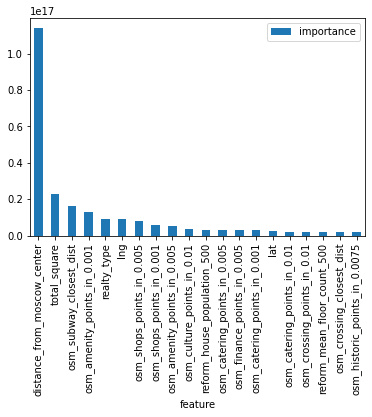

In [62]:
imp_df.plot.bar(x='feature', y='importance')

In [63]:
!python predict.py --model_path ./model/model_city_center.pkl --test_data ./data/test_my.csv --output ./data/predict_city_center.csv

sys:1: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.


In [64]:
from raif_hack.metrics import deviation_metric

In [74]:
def get_metrics(test_df, pred_df):
    pred_df = pred_df.sort_values('id')
    test_df = test_df.sort_values('id')
    y_true = test_df['per_square_meter_price'].tolist()
    #pred_df['per_square_meter_price'] = pred_df['per_square_meter_price']
    y_pred = pred_df['per_square_meter_price'].tolist()
    return deviation_metric(y_true, y_pred)

In [75]:
df_pred = pd.read_csv('./data/predict_city_center.csv')
get_metrics(test_df, df_pred)

3.559655943074468

with distance to reg center 3.559506749550894

In [9]:
from raif_hack.features import get_distance_to_city_center

In [15]:
test_df.head(5).apply(lambda x: get_distance_to_city_center(x), axis=1)

216549    10.101803
216559     0.687889
216537     5.638906
216535    12.213912
216515     0.223759
dtype: float64

In [51]:
test_df.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,distance_from_city_center
216549,Самара,0,COL_221291,53.233402,50.253670,2,20,34,48,0,...,7.600000,1965.580292,1982.650000,Самарская область,250.0,S12180,2020-07-12,10,0,0.0
216559,Обоянь,NaN,COL_221301,51.209827,36.266605,0,15,21,26,0,...,2.142857,1934.695652,1930.888889,Курская область,30.0,S23356,2020-07-12,110,0,0.0
216537,Воронеж,NaN,COL_221278,51.650400,39.120770,0,21,58,89,0,...,8.142857,1976.216216,1976.542857,Воронежская область,4431.0,S11130,2020-07-12,10,0,0.0
216535,Уфа,0,COL_221276,54.813038,56.063362,0,10,17,31,0,...,5.333333,1964.112150,1970.090909,Башкортостан,78.0,S14617,2020-07-12,110,0,0.0
216515,Краснодар,NaN,COL_221256,45.036970,38.974990,8,131,226,344,0,...,2.577465,1926.123487,1928.028169,Краснодарский край,60.0,S11307,2020-07-12,110,0,0.0


# Попробуем для Москвы достать район и использовать в качестве фичи

Без района метрика == 2.7472392161261316

In [15]:
df.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,...,7.263889,5.684211,1963.229167,1960.500000,Москва,60.200000,S1338,2020-01-05,10,0
2516,Москва,1,COL_2562,55.993423,37.225636,0,14,35,63,0,...,12.773585,13.250000,1983.509434,1987.950000,Москва,63.500000,S30485,2020-01-05,100,0
2517,Москва,1,COL_2563,55.760433,37.614418,32,314,618,1038,0,...,5.070312,4.972222,1917.289062,1921.305556,Москва,131.699997,S4122,2020-01-05,110,0
2518,Москва,1,COL_2564,55.788120,37.589237,5,78,200,425,0,...,7.166667,7.705882,1948.769841,1950.088235,Москва,1182.000000,S4724,2020-01-05,100,0
2532,Москва,NaN,COL_2578,55.759796,37.615370,11,323,588,1042,0,...,5.049587,4.645161,1917.371901,1921.709677,Москва,988.000000,S4122,2020-01-05,10,0


In [16]:
geolocator = Nominatim(user_agent="test_raif")

def get_district_name_from_address(address_list):
    for part in address_list:
        if 'район' in part:
            return part.strip()
    return None

def get_district(row):
    coords = str(row['lat']) + ',' + str(row['lng'])
    try:
        location = geolocator.reverse(coords)
    except:
        print('error in id:', row['id'])
        return None
    location_list = location.address.split(',')
    district = get_district_name_from_address(location_list)
    return district

In [20]:
import time
from tqdm import tqdm
tqdm.pandas()

for _, row in df.head(4).iterrows():
    time.sleep(1)
    get_district(row)

In [ ]:
train_df['district']=train_df.progress_apply(lambda x: get_district(x), axis=1)
train_df.to_csv('./data/train_msk_distr.csv')
train_df.head()

In [ ]:
test_df['district']=test_df.progress_apply(lambda x: get_district(x), axis=1)
test_df.to_csv('./data/test_msk_distr.csv')
test_df.head()

  6%|██                                   | 630/11200 [05:14<1:54:48,  1.53it/s]

error in id: COL_220791


 10%|███▍                                | 1076/11200 [08:58<1:50:52,  1.52it/s]

error in id: COL_223535


 11%|███▉                                | 1230/11200 [10:14<1:25:32,  1.94it/s]

error in id: COL_235849


 13%|████▌                               | 1412/11200 [11:46<1:47:24,  1.52it/s]

error in id: COL_233610


 14%|█████                               | 1587/11200 [13:14<1:44:53,  1.53it/s]

error in id: COL_236849


 16%|█████▋                              | 1777/11200 [14:48<1:06:36,  2.36it/s]

error in id: COL_235969


 16%|█████▊                              | 1790/11200 [14:55<1:18:29,  2.00it/s]

# Не хватает времени на обработку данных


In [ ]:
!python train.py --train_data ./data/train_msk_distr.csv --model_path ./model/model_base_msk_distr.pkl

In [ ]:
!python predict.py --model_path ./model/model_base_msk_distr.pkl --test_data ./data/test_msk_distr.csv --output ./data/predict_base_msk_distr.csv

In [ ]:
pred_df = pd.read_csv('./data/predict_base_msk_distr.csv')

In [ ]:
get_metrics(test_df, pred_df)